<a href="https://colab.research.google.com/github/keshavub20/tensorflow_nn/blob/main/custom_fashion_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.5180
Epoch 2/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2654
Epoch 3/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2109
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1798
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.2555
9


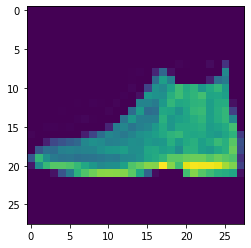

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('loss')<0.3):
      self.model.stop_training= True

callback=mycallback()

fash_mnist=tf.keras.datasets.fashion_mnist
(train_data,train_labels),(test_data,test_labels)=fash_mnist.load_data()
train_data=train_data.reshape(60000,28,28,1)
train_data=train_data/255.0
test_data=test_data.reshape(10000,28,28,1)
test_data=test_data/255.0
model=tf.keras.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),tf.keras.layers.MaxPooling2D(2,2),tf.keras.layers.Flatten(),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
model.fit(train_data,train_labels,epochs=5)
model.evaluate(test_data,test_labels)
plt.imshow(test_data[0].reshape(28,28))
print(np.argmax(model.predict(np.expand_dims(test_data[0],0))))

Saving dre.png to dre.png
3


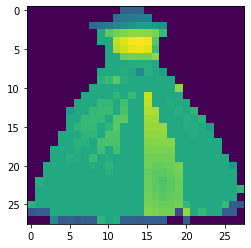

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
uploaded= files.upload()
for upd in uploaded.keys():
  path='/content/'+ upd
  img=image.load_img(path, color_mode='grayscale',target_size=(28,28,1)) 
  img_array=image.img_to_array(img)
  img_array = np.array([img_array])
  img_array=img_array/255.0
  plt.imshow(img_array.reshape(28,28))
  print(np.argmax(model.predict(img_array)))
plt.show()